In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

In [4]:
stock_data=pd.read_csv("/content/MSFT.csv")

In [5]:
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,3/13/1986,0.088542,0.101563,0.088542,0.097222,0.062549,1031788800
1,3/14/1986,0.097222,0.102431,0.097222,0.100694,0.064783,308160000
2,3/17/1986,0.100694,0.103299,0.100694,0.102431,0.065899,133171200
3,3/18/1986,0.102431,0.103299,0.098958,0.099826,0.064224,67766400
4,3/19/1986,0.099826,0.100694,0.097222,0.098090,0.063107,47894400
...,...,...,...,...,...,...,...
8520,12/31/2019,156.770004,157.770004,156.449997,157.699997,157.699997,18369400
8521,1/2/2020,158.779999,160.729996,158.330002,160.619995,160.619995,22622100
8522,1/3/2020,158.320007,159.949997,158.059998,158.619995,158.619995,21116200
8523,1/6/2020,157.080002,159.100006,156.509995,159.029999,159.029999,20813700


In [6]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,3/13/1986,0.088542,0.101563,0.088542,0.097222,0.062549,1031788800
1,3/14/1986,0.097222,0.102431,0.097222,0.100694,0.064783,308160000
2,3/17/1986,0.100694,0.103299,0.100694,0.102431,0.065899,133171200
3,3/18/1986,0.102431,0.103299,0.098958,0.099826,0.064224,67766400
4,3/19/1986,0.099826,0.100694,0.097222,0.098090,0.063107,47894400


In [7]:
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8525.000000,8525.000000,8525.000000,8525.000000,8525.000000,8.525000e+03
mean,28.220247,28.514473,27.918967,28.224480,23.417934,6.045692e+07
std,28.626752,28.848988,28.370344,28.626571,28.195330,3.891225e+07
min,0.088542,0.092014,0.088542,0.090278,0.058081,2.304000e+06
25%,3.414063,3.460938,3.382813,3.414063,2.196463,3.667960e+07
50%,26.174999,26.500000,25.889999,26.160000,18.441576,5.370240e+07
75%,34.230000,34.669998,33.750000,34.230000,25.392508,7.412350e+07
max,159.449997,160.729996,158.330002,160.619995,160.619995,1.031789e+09


In [8]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8525 entries, 0 to 8524
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8525 non-null   object 
 1   Open       8525 non-null   float64
 2   High       8525 non-null   float64
 3   Low        8525 non-null   float64
 4   Close      8525 non-null   float64
 5   Adj Close  8525 non-null   float64
 6   Volume     8525 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 466.3+ KB


In [9]:
stock_data.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
8520,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False
8522,False,False,False,False,False,False,False
8523,False,False,False,False,False,False,False


In [10]:
stock_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
stock_data = stock_data.dropna()
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,3/13/1986,0.088542,0.101563,0.088542,0.097222,0.062549,1031788800
1,3/14/1986,0.097222,0.102431,0.097222,0.100694,0.064783,308160000
2,3/17/1986,0.100694,0.103299,0.100694,0.102431,0.065899,133171200
3,3/18/1986,0.102431,0.103299,0.098958,0.099826,0.064224,67766400
4,3/19/1986,0.099826,0.100694,0.097222,0.098090,0.063107,47894400
...,...,...,...,...,...,...,...
8520,12/31/2019,156.770004,157.770004,156.449997,157.699997,157.699997,18369400
8521,1/2/2020,158.779999,160.729996,158.330002,160.619995,160.619995,22622100
8522,1/3/2020,158.320007,159.949997,158.059998,158.619995,158.619995,21116200
8523,1/6/2020,157.080002,159.100006,156.509995,159.029999,159.029999,20813700


In [12]:
stock_data['Log_Returns'] = np.log(stock_data['Close']).diff()
stock_data['Log_Returns']

0            NaN
1       0.035089
2       0.017103
3      -0.025761
4      -0.017543
          ...   
8520    0.000698
8521    0.018347
8522   -0.012530
8523    0.002581
8524   -0.009160
Name: Log_Returns, Length: 8525, dtype: float64

(array([2867., 3318., 1197.,  416.,  176.,  132.,  194.,   71.,  113.,
          41.]),
 array([9.02780000e-02, 1.61432497e+01, 3.21962214e+01, 4.82491931e+01,
        6.43021648e+01, 8.03551365e+01, 9.64081082e+01, 1.12461080e+02,
        1.28514052e+02, 1.44567023e+02, 1.60619995e+02]),
 <BarContainer object of 10 artists>)

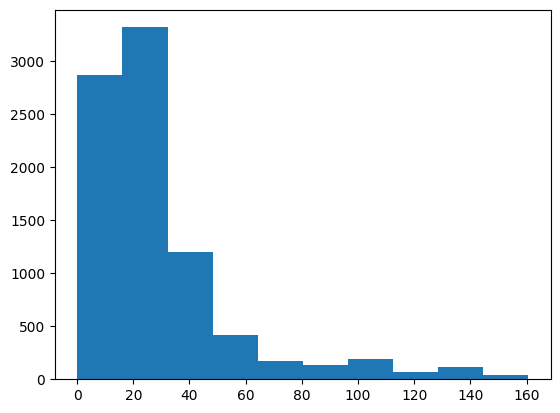

In [18]:
plt.hist(stock_data['Close'])

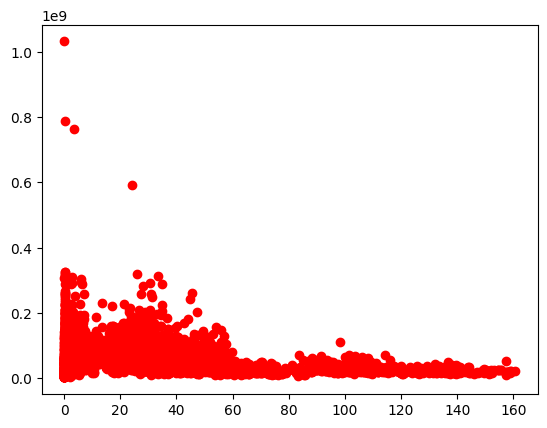

In [25]:
plt.scatter(stock_data['Close'],stock_data['Volume'], color='r', marker='o')

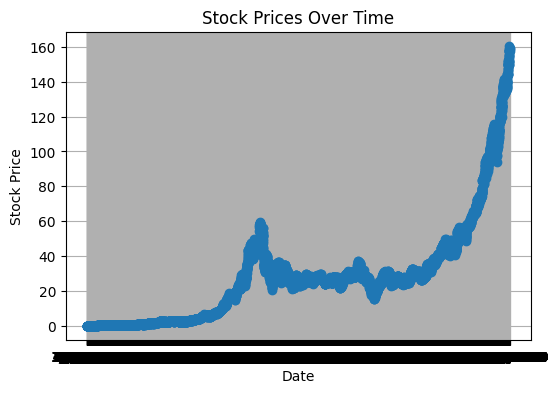

In [26]:
plt.figure(figsize=(6, 4))
plt.plot(stock_data['Date'], stock_data['Close'], marker='o', linestyle='-')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()

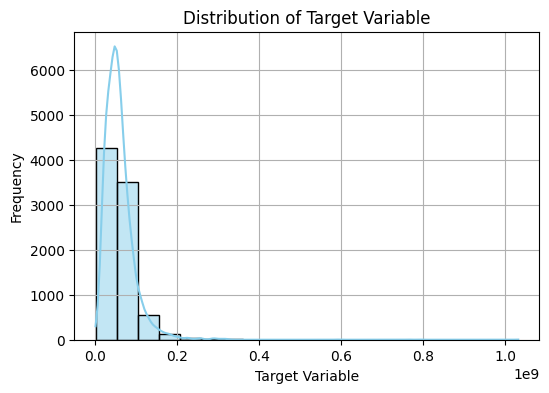

In [15]:
plt.figure(figsize=(6, 4))
sns.histplot(stock_data['Volume'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [30]:
stock_data_encoded = pd.get_dummies(stock_data, columns=['Date'])
stock_data_encoded

,Open,High,Low,Close,Adj Close,Volume,Log_Returns,MA,RSI,Date_1/10/1989,...,Date_9/9/2005,Date_9/9/2008,Date_9/9/2009,Date_9/9/2010,Date_9/9/2011,Date_9/9/2013,Date_9/9/2014,Date_9/9/2015,Date_9/9/2016,Date_9/9/2019
0,0.088542,0.101563,0.088542,0.097222,0.062549,1031788800,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
1,0.097222,0.102431,0.097222,0.100694,0.064783,308160000,0.035089,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
2,0.100694,0.103299,0.100694,0.102431,0.065899,133171200,0.017103,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
3,0.102431,0.103299,0.098958,0.099826,0.064224,67766400,-0.025761,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
4,0.099826,0.100694,0.097222,0.098090,0.063107,47894400,-0.017543,0.099653,NaN,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8520,156.770004,157.770004,156.449997,157.699997,157.699997,18369400,0.000698,158.060001,78.100859,0,...,0,0,0,0,0,0,0,0,0,0
8521,158.779999,160.729996,158.330002,160.619995,160.619995,22622100,0.018347,158.707999,81.766316,0,...,0,0,0,0,0,0,0,0,0,0
8522,158.320007,159.949997,158.059998,158.619995,158.619995,21116200,-0.012530,158.697998,68.551667,0,...,0,0,0,0,0,0,0,0,0,0
8523,157.080002,159.100006,156.509995,159.029999,159.029999,20813700,0.002581,158.711996,66.519790,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
def compute_RSI(data, window=14):
    close = data['Close']
    delta = close.diff()
    gain = delta.mask(delta < 0, 0)
    loss = -delta.mask(delta > 0, 0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

In [33]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_data = encoder.fit_transform(stock_data[['Date']].astype(str))

stock_data_encoded = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['Date']))

stock_data_encoded = pd.concat([stock_data, stock_data_encoded], axis=1)

In [35]:
stock_data_encoded.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Log_Returns,MA,RSI,...,Date_2019-12-23,Date_2019-12-24,Date_2019-12-26,Date_2019-12-27,Date_2019-12-30,Date_2019-12-31,Date_2020-01-02,Date_2020-01-03,Date_2020-01-06,Date_2020-01-07
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.062549,1031788800,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.064783,308160000,0.035089,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065899,133171200,0.017103,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.064224,67766400,-0.025761,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.063107,47894400,-0.017543,0.099653,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
stock_data['MA'] = stock_data['Close'].rolling(window=5).mean()
stock_data['RSI'] = compute_RSI(stock_data)

In [36]:
from sklearn.preprocessing import StandardScaler

In [38]:
# scaler = MinMaxScaler()
scaler=StandardScaler()
scaled_data = scaler.fit_transform(stock_data[['Close', 'MA', 'RSI']])

In [39]:
X = scaled_data
y = stock_data['Volume']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)